<a href="https://colab.research.google.com/github/MohammadrezaMirzaei/Algorithmic-Trading/blob/main/Algorithmic_Trading_Arian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.6.0" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools Plots"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Success! Please reload this page and jump to the next section."
fi

Installing Julia 1.6.0 on the current Colab Runtime...
2021-10-06 11:24:35 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.6/julia-1.6.0-linux-x86_64.tar.gz [112838927/112838927] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing Julia package Plots...
Installing Julia package CUDA...


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [1]:
versioninfo()

Julia Version 1.6.0
Commit f9720dc2eb (2021-03-24 12:55 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU @ 2.30GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-11.0.1 (ORCJIT, haswell)
Environment:
  JULIA_NUM_THREADS = 2


In [2]:
using BenchmarkTools

M = rand(2048, 2048)
@benchmark M^2

BenchmarkTools.Trial: 10 samples with 1 evaluation.
 Range (min … max):  488.812 ms … 629.892 ms  ┊ GC (min … max): 0.56% … 17.91%
 Time  (median):     499.870 ms               ┊ GC (median):    0.10%
 Time  (mean ± σ):   511.666 ms ±  41.996 ms  ┊ GC (mean ± σ):  2.79% ±  5.65%

  █ ▁▁▁█ ▁▁                                                   ▁  
  █▁████▁██▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  489 ms           Histogram: frequency by time          630 ms <

 Memory estimate: 32.00 MiB, allocs estimate: 2.

In [3]:
if ENV["COLAB_GPU"] == "1"
    using CUDA

    M_gpu = cu(M)
    @benchmark CUDA.@sync M_gpu^2
else
    println("No GPU found.")
end

BenchmarkTools.Trial: 536 samples with 1 evaluation.
 Range (min … max):  6.430 ms … 275.304 ms  ┊ GC (min … max): 0.00% … 1.56%
 Time  (median):     7.927 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   9.319 ms ±  19.293 ms  ┊ GC (mean ± σ):  0.27% ± 0.13%

                     █    ▁▂                                   
  ▅▆▅▂▃▄▅▅▃▃▃▄▃▃▅▄▂▃▇██▇▄████▅▃▅█▃▂▃▃▂▃▂▂▁▁▂▁▁▂▁▁▁▂▂▁▁▁▁▁▁▁▁▂ ▃
  6.43 ms         Histogram: frequency by time        10.7 ms <

 Memory estimate: 101.80 KiB, allocs estimate: 3259.

# Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />

### <h1> *** Algorithmic Trading *** </h1>

In [4]:
println("Hello world")

Hello world


In [ ]:
println("this is a "*"sentence")

this is a sentence


<h2>Logical Statements</h2>

In [ ]:
true

true

In [ ]:
!false

true

In [ ]:
true || false

true

In [ ]:
true && false

false

In [ ]:
1 == 100

false

In [ ]:
1 === 1.0

false

In [ ]:
typeof(1)

Int64

In [ ]:
typeof(1.0)

Float64

In [ ]:
typeof('A')

Char

In [ ]:
typeof("A")

String

In [ ]:
typeof("πβ")

String

In [ ]:
typeof(π)

Irrational{:π}

<h2>Functions in Julia</h2>

In [ ]:
Array{Float64}(undef,10)

10-element Vector{Float64}:
 8.4e-323
 1.5e-323
 6.93218584944465e-310
 9.4e-323
 2.0e-323
 6.93218584946994e-310
 1.1e-322
 2.5e-323
 6.93218584944465e-310
 5.0e-324

In [ ]:
Array{Int64}(undef,10)

10-element Vector{Int64}:
  4294967296
  4294967297
 30064771077
  8589934594
 12884901896
           4
           0
           0
           0
           0

In [ ]:
my_first_array = Array{Integer}(undef,10)

10-element Vector{Integer}:
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef

In [ ]:
my_first_matrix = Array{Int64}(undef,3,3)

3×3 Matrix{Int64}:
 140308973297648  140308973297712  140308973297808
 140308973297680  140308973297744  140308973297840
 140309601750000  140308973297776  140308972806160

In [ ]:
my_first_matrix[1,1]

140308973297648

In [ ]:
my_first_matrix[1,1] = 12

12

In [ ]:
my_first_matrix


3×3 Matrix{Int64}:
              12  140308973297712  140308973297808
 140308973297680  140308973297744  140308973297840
 140309601750000  140308973297776  140308972806160

In [ ]:
log10(1)

0.0

In [ ]:
log(2.71)

0.9969486348916096

In [ ]:
atan(π/2)

1.0038848218538872

In [ ]:
acos(0)

1.5707963267948966

In [ ]:
asin(0)

0.0

In [ ]:
?asin

search: asin asinh asind lastindex isassigned CartesianIndex CartesianIndices



```
asin(x)
```

Compute the inverse sine of `x`, where the output is in radians.

---

```
asin(A::AbstractMatrix)
```

Compute the inverse matrix sine of a square matrix `A`.

If `A` is symmetric or Hermitian, its eigendecomposition ([`eigen`](@ref)) is used to compute the inverse sine. Otherwise, the inverse sine is determined by using [`log`](@ref) and [`sqrt`](@ref).  For the theory and logarithmic formulas used to compute this function, see [^AH16_2].

[^AH16_2]: Mary Aprahamian and Nicholas J. Higham, "Matrix Inverse Trigonometric and Inverse Hyperbolic Functions: Theory and Algorithms", MIMS EPrint: 2016.4. [https://doi.org/10.1137/16M1057577](https://doi.org/10.1137/16M1057577)

# Examples

```julia-repl
julia> asin(sin([0.5 0.1; -0.2 0.3]))
2×2 Matrix{ComplexF64}:
  0.5-4.16334e-17im  0.1-5.55112e-17im
 -0.2+9.71445e-17im  0.3-1.249e-16im
```


In [ ]:
methods(asin)

# 12 methods for generic function "asin":
[1] asin(a::Float16) in Base.Math at math.jl:1159
[2] asin(a::ComplexF16) in Base.Math at math.jl:1160
[3] asin(z::Complex) in Base at complex.jl:875
[4] asin(x::T) where T<:Union{Float32, Float64} in Base.Math at special/trig.jl:425
[5] asin(::Missing) in Base.Math at math.jl:1206
[6] asin(x::BigFloat) in Base.MPFR at mpfr.jl:728
[7] asin(x::Real) in Base.Math at math.jl:404
[8] asin(A::LinearAlgebra.Hermitian{var"#s831", S} where {var"#s831"<:Complex, S<:(AbstractMatrix{var"#s832"} where var"#s832"<:var"#s831")}) in LinearAlgebra at /usr/local/share/julia/stdlib/v1.6/LinearAlgebra/src/symmetric.jl:948
[9] asin(A::Union{LinearAlgebra.Hermitian{var"#s832", S}, LinearAlgebra.Symmetric{var"#s832", S}} where {var"#s832"<:Real, S}) in LinearAlgebra at /usr/local/share/julia/stdlib/v1.6/LinearAlgebra/src/symmetric.jl:939
[10] asin(D::LinearAlgebra.Diagonal) in LinearAlgebra at /usr/local/share/julia/stdlib/v1.6/LinearAlgebra/src/diagonal.jl:610
[11] asin(A::AbstractMatrix{T} where T) in LinearAlgebra at /usr/local/share/julia/stdlib/v1.6/LinearAlgebra/src/dense.jl:1064
[12] asin(J::LinearAlgebra.UniformScaling) in LinearAlgebra at /usr/local/share/julia/stdlib/v1.6/LinearAlgebra/src/uniformscaling.jl:174

In [ ]:
methods(log)

# 19 methods for generic function "log":
[1] log(A::StridedMatrix{T} where T) in LinearAlgebra at /usr/local/share/julia/stdlib/v1.6/LinearAlgebra/src/dense.jl:712
[2] log(D::LinearAlgebra.Diagonal) in LinearAlgebra at /usr/local/share/julia/stdlib/v1.6/LinearAlgebra/src/diagonal.jl:610
[3] log(A::LinearAlgebra.LowerTriangular) in LinearAlgebra at /usr/local/share/julia/stdlib/v1.6/LinearAlgebra/src/triangular.jl:1953
[4] log(J::LinearAlgebra.UniformScaling) in LinearAlgebra at /usr/local/share/julia/stdlib/v1.6/LinearAlgebra/src/uniformscaling.jl:174
[5] log(A0::LinearAlgebra.UpperTriangular{T, S} where S<:AbstractMatrix{T}) where T<:Union{Float32, Float64, ComplexF32, ComplexF64} in LinearAlgebra at /usr/local/share/julia/stdlib/v1.6/LinearAlgebra/src/triangular.jl:1794
[6] log(A::LinearAlgebra.Hermitian{T, S} where S<:(AbstractMatrix{var"#s832"} where var"#s832"<:T)) where T<:Complex in LinearAlgebra at /usr/local/share/julia/stdlib/v1.6/LinearAlgebra/src/symmetric.jl:1028
[7] log(A::Union{LinearAlgebra.Hermitian{T, S}, LinearAlgebra.Symmetric{T, S}} where S) where T<:Real in LinearAlgebra at /usr/local/share/julia/stdlib/v1.6/LinearAlgebra/src/symmetric.jl:1017
[8] log(::Irrational{:ℯ}) in Base.MathConstants at mathconstants.jl:95
[9] log(::Irrational{:ℯ}, x::Number) in Base.MathConstants at mathconstants.jl:96
[10] log(x::BigFloat) in Base.MPFR at mpfr.jl:657
[11] log(::Missing) in Base.Math at math.jl:1206
[12] log(x::Float32) in Base.Math at special/log.jl:289
[13] log(x::Float64) in Base.Math at special/log.jl:253
[14] log(a::ComplexF16) in Base.Math at math.jl:1160
[15] log(z::Complex) in Base at complex.jl:587
[16] log(a::Float16) in Base.Math at math.jl:1159
[17] log(x::Real) in Base.Math at math.jl:404
[18] log(b::T, x::T) where T<:Number in Base.Math at math.jl:274
[19] log(b::Number, x::Number) in Base.Math at math.jl:317

In [ ]:
my_addition(x, y) = x + y

my_addition (generic function with 1 method)

In [ ]:
methods(my_addition)

# 1 method for generic function "my_addition":
[1] my_addition(x, y) in Main at In[30]:1

In [ ]:
my_addition(1,2)

3

In [ ]:
function my_addition2(x, y) 
    x + y
end

my_addition2 (generic function with 1 method)

In [ ]:
my_addition2(2,3)

5

<h2>Using The PyCall Package</h2>


In [6]:
using Pkg
Pkg.add("PyCall")


    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
   Installed PyCall ─ v1.92.3
    Updating `~/.julia/environments/v1.6/Project.toml`
  [438e738f] + PyCall v1.92.3
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [438e738f] + PyCall v1.92.3
    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/169bb8ea6b1b143c5cf57df6d34d022a7b60c6db/build.log`
Precompiling project...
  ✓ PyCall
1 dependency successfully precompiled in 8 seconds (140 already precompiled, 3 skipped during auto due to previous errors)


In [13]:
using PyCall
py"""
import math

def myfunction(x):
  return x**2


function_result = myfunction(5)
"""

In [14]:
py"function_result"

25

<h2>Using Files</h2>

---



In [16]:
using DelimitedFiles
hedgefunds_data = readdlm("input_data.csv", ',')

1009×12 Matrix{Any}:
 "\ufeffRow Labels"  …     "HFRX Equal Weighted Strategies EUR Index"
 "4/16/2012"            100.0
 "4/17/2012"            100.147
 "4/18/2012"            100.191
 "4/19/2012"            100.128
 "4/20/2012"         …  100.167
 "4/23/2012"            100.019
 "4/24/2012"            100.043
 "4/25/2012"            100.184
 "4/26/2012"            100.175
 "4/27/2012"         …  100.28
 "4/30/2012"            100.315
 "5/1/2012"             100.303
 ⋮                   ⋱  
 "3/30/2016"            100.798
 "3/31/2016"            100.796
 "4/1/2016"             100.807
 "4/4/2016"          …  100.823
 "4/5/2016"             100.599
 "4/6/2016"             100.733
 "4/7/2016"             100.645
 "4/8/2016"             100.656
 "4/11/2016"         …  100.679
 "4/12/2016"            100.684
 "4/13/2016"            100.954
 "4/14/2016"            100.928

In [18]:
println(hedgefunds_data[2,1])
typeof(hedgefunds_data[2,1])

4/16/2012


SubString{String}

In [19]:
rows, cols = size(hedgefunds_data)

(1009, 12)

In [20]:
using Dates
Dates.DateTime("2 OCT 2021", "d u y")

2021-10-02T00:00:00

In [21]:
DateTime("2/10/2021","dd/mm/yyyy")

2021-10-02T00:00:00

In [22]:
col_time = hedgefunds_data[:,1]
for i = 2:rows
  col_time[i] = Dates.DateTime(hedgefunds_data[i,1],"mm/dd/yyyy")
end

**Date time -> Rata**

CTRL + 1 For time Change in Excel to change date and time to number


In [23]:
Dates.datetime2rata(col_time[2])

734609

In [24]:
col_time_days = hedgefunds_data[:,1]
col_time_rata = hedgefunds_data[:,1]
for i = 2:rows
  col_time_days[i] = col_time[i] - col_time[2]
  col_time_rata[i] = Dates.datetime2rata(col_time[i]) - Dates.datetime2rata(col_time[2])
end

In [25]:
col_time_days

1009-element Vector{Any}:
 "\ufeffRow Labels"
 0 milliseconds
 86400000 milliseconds
 172800000 milliseconds
 259200000 milliseconds
 345600000 milliseconds
 604800000 milliseconds
 691200000 milliseconds
 777600000 milliseconds
 864000000 milliseconds
 950400000 milliseconds
 1209600000 milliseconds
 1296000000 milliseconds
 ⋮
 124761600000 milliseconds
 124848000000 milliseconds
 124934400000 milliseconds
 125193600000 milliseconds
 125280000000 milliseconds
 125366400000 milliseconds
 125452800000 milliseconds
 125539200000 milliseconds
 125798400000 milliseconds
 125884800000 milliseconds
 125971200000 milliseconds
 126057600000 milliseconds

In [26]:
col_time_rata

1009-element Vector{Any}:
     "\ufeffRow Labels"
    0
    1
    2
    3
    4
    7
    8
    9
   10
   11
   14
   15
    ⋮
 1444
 1445
 1446
 1449
 1450
 1451
 1452
 1453
 1456
 1457
 1458
 1459

In [29]:
using Pkg
Pkg.add("Plots")
using Plots

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [30]:
gr()
#pyplot()

Plots.GRBackend()

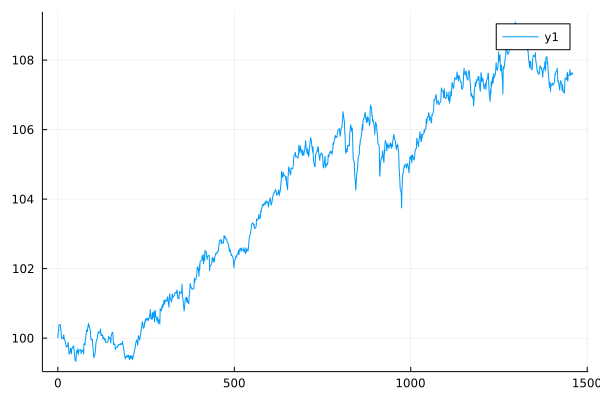

In [32]:
x = hedgefunds_data[2:end, 2]
y = hedgefunds_data[2:end, 3]
plot(x,y)

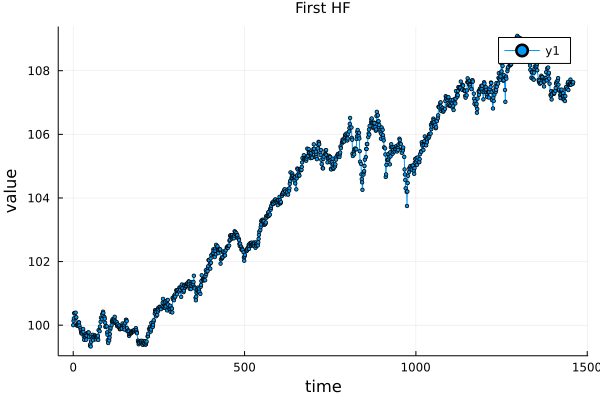

In [35]:
plot(x, y, title = "First HF", xaxis = "time", yaxis = "value", titlefontsize = 10, linetype = :line, marker = (:circle,2))
#scatter

In [36]:
savefig("HF1")

In [37]:
x

1008-element Vector{Any}:
    0
    1
    2
    3
    4
    7
    8
    9
   10
   11
   14
   15
   16
    ⋮
 1444
 1445
 1446
 1449
 1450
 1451
 1452
 1453
 1456
 1457
 1458
 1459

In [38]:
y

1008-element Vector{Any}:
 100.0
 100.1369531
 100.2128041
 100.3803082
 100.3718804
 100.3940036
 100.2328203
 100.2475691
 100.0242302
  99.98735817
 100.0147488
  99.97682332
 100.0905997
   ⋮
 107.6472509
 107.3923074
 107.569293
 107.5608651
 107.569293
 107.7220484
 107.6398765
 107.5619186
 107.6251277
 107.6251277
 107.5914162
 107.6377696

In [43]:
ys = Array{Real}(hedgefunds_data[2:end,3:end])

1008×10 Matrix{Real}:
 100.0     100.0     100.0     100.0    …  100.0     100.0     100.0
 100.137    99.9457  100.162   100.715      99.9328  100.16    100.147
 100.213    99.9879  100.188   100.865     100.086   100.197   100.191
 100.38    100.015   100.152   100.705     100.099   100.14    100.128
 100.372    99.9849  100.214   100.806     100.279   100.176   100.167
 100.394    99.9286  100.045   100.343  …  100.251   100.029   100.019
 100.233    99.9185   99.9993  100.358     100.123   100.048   100.043
 100.248    99.8642  100.138   100.677     100.079   100.192   100.184
 100.024    99.8893   99.9111  100.785      99.86    100.178   100.175
  99.9874  100.022   100.104   101.033     100.018   100.283   100.28
 100.015    99.9376  100.106   100.774  …   99.7447  100.314   100.315
  99.9768  100.001   100.286   100.841      99.7743  100.302   100.303
 100.091   100.058   100.178   100.852      99.9564  100.365   100.362
   ⋮                                    ⋱                 

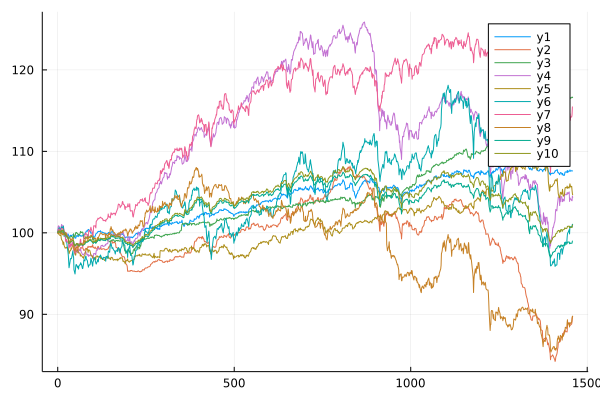

In [44]:
plot(x, ys)

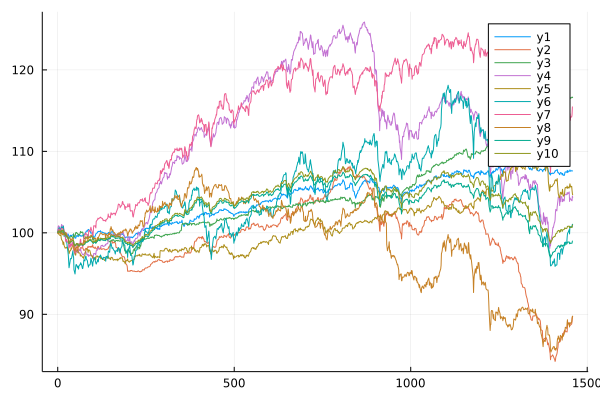

In [48]:
p = plot()
for col in eachcol(hedgefunds_data[2:end,3:end])
  plot!(p, x, col)
end
display(p)

In [51]:
!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/MohammadrezaMirzaei/Algorithmic-Trading.git
!git push -u origin main


LoadError: ignored